## Contours

https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
import torch

In [39]:
features = [1,2,3]
features[:2]

[1, 2]

In [38]:
features

tensor([1, 2, 3])

In [2]:
img = cv2.imread('assets/ayu_text.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [3]:
#RETR_TREE gives all the counters in form of list
print("The Lenfth of the contour list:",len(contours))
print("The dtype",type(contours))
print("The shape of each counter",contours[0].shape)
print("The shape of each counter",type(contours[0]))

The Lenfth of the contour list: 4
The dtype <class 'list'>
The shape of each counter (236, 1, 2)
The shape of each counter <class 'numpy.ndarray'>


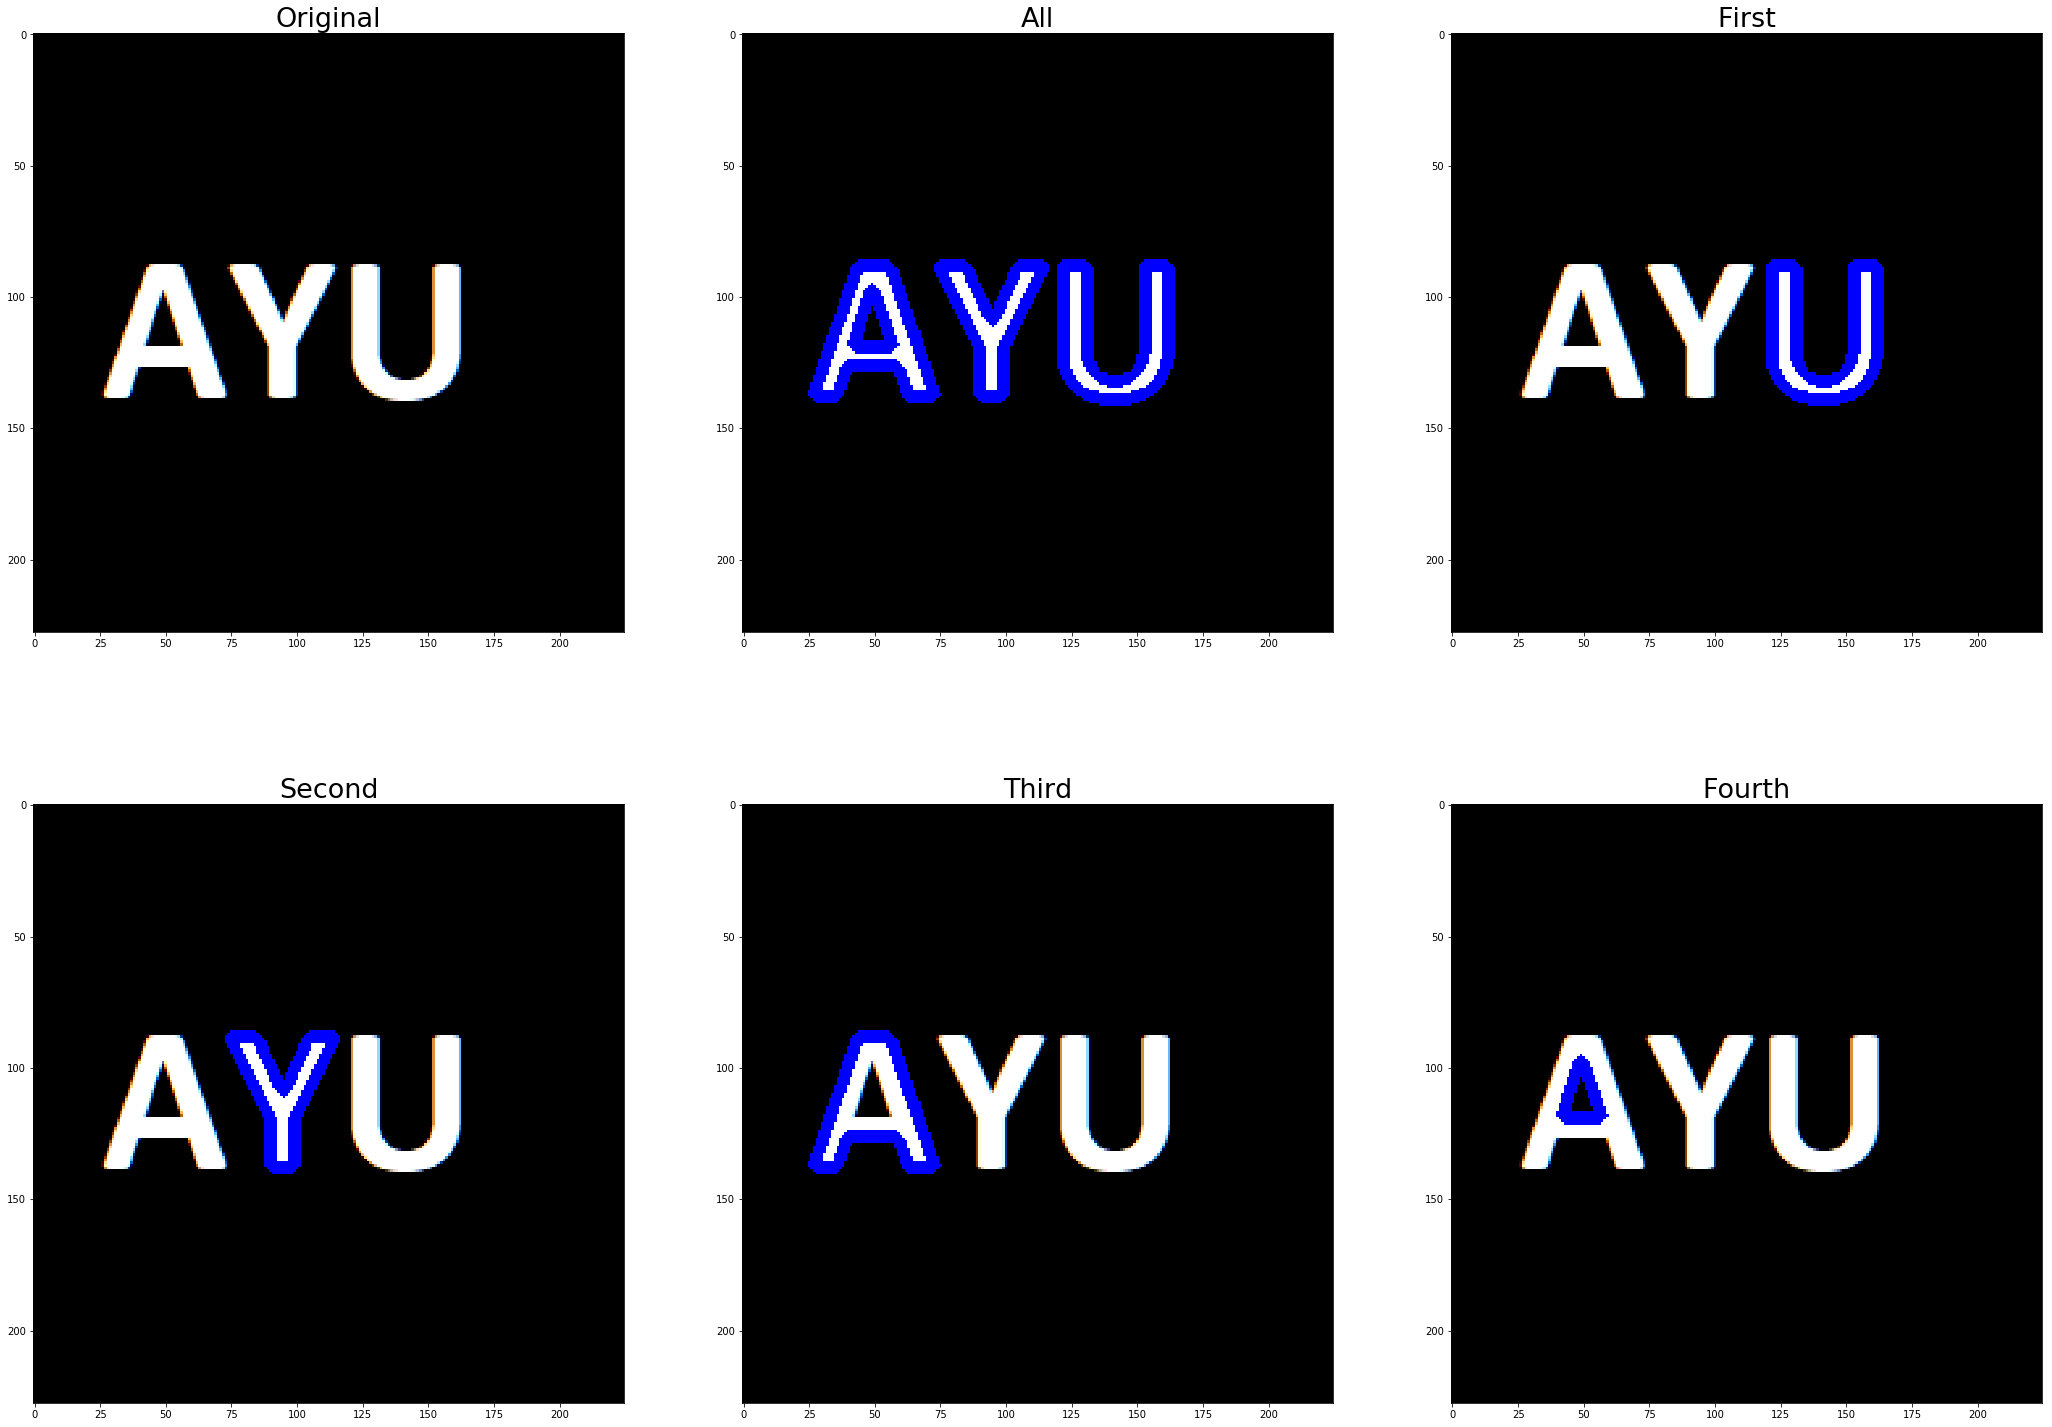

In [4]:
list_ = [-2,-1,0,1,2,3]
titles = ["Original","All","First","Second","Third","Fourth"]
fig = plt.figure(figsize = (36, 26)) 
for i in list_:
    img_c = img.copy()
    img_contour = cv2.drawContours(img_c, contours, i, (0,0,255), 3)
    ax = fig.add_subplot(2, 3, i +3)
    if(i == -2):
        ax.imshow(img,cmap = 'gray')
    else:
        ax.imshow(img_contour,cmap = 'gray')
    ax.set_title(titles[i+2],fontsize=27)

Centroid is given by the relations, C_x = \frac{M_{10}}{M_{00}} and C_y = \frac{M_{01}}{M_{00}}. This can be done as follows:

In [5]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)


{'m00': 722.5, 'm10': 68220.16666666666, 'm01': 78361.83333333333, 'm20': 6494384.083333333, 'm11': 7399808.125, 'm02': 8633291.416666666, 'm30': 623209861.0500001, 'm21': 703903901.5166667, 'm12': 815327576.85, 'm03': 966303249.5500001, 'mu20': 52873.85492118541, 'mu11': 697.6332276072353, 'mu02': 134223.0106305275, 'mu30': 9735.164308786392, 'mu21': -604096.3393036034, 'mu12': 358.90630226023495, 'mu03': 827172.750019908, 'nu20': 0.10128969705091731, 'nu11': 0.0013364461203428796, 'nu02': 0.2571291256197172, 'nu30': 0.0006938229438427954, 'nu21': -0.04305380856509989, 'nu12': 2.5579170448430927e-05, 'nu03': 0.058952413568138164}
94 108


In [6]:
area = cv2.contourArea(cnt)
print(area)

722.5


In [7]:
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

188.95331752300262


In [8]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

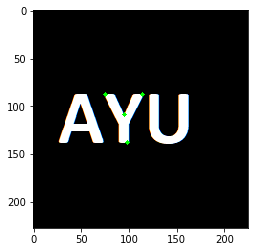

In [9]:
img_c = img.copy()
approx_img = cv2.drawContours(img_c,approx,-1,(0,255,0),3)
plt.imshow(approx_img)

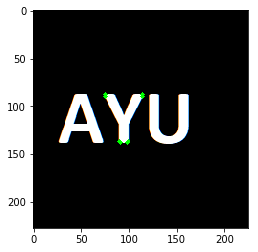

In [10]:
hull = cv2.convexHull(cnt)
img_c = img.copy()
approx_img = cv2.drawContours(img_c,hull,-1,(0,255,0),3)
plt.imshow(approx_img)

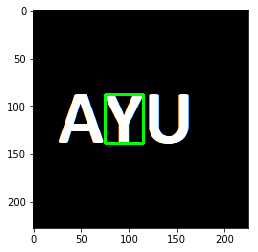

In [11]:
img_c = img.copy()
x,y,w,h = cv2.boundingRect(cnt)
rect_img = cv2.rectangle(img_c,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(rect_img)

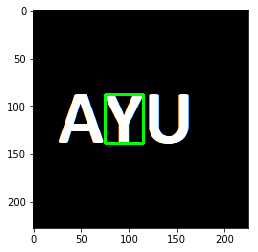

In [12]:
img_c = img.copy()
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
min_rect_img = cv2.drawContours(img_c,[box],0,(0,0,255),2)
plt.imshow(rect_img)

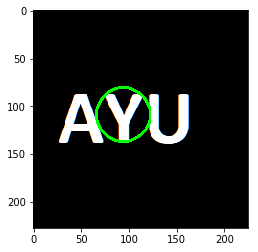

In [13]:
img_c = img.copy()
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
circle_image = cv2.circle(img_c,center,radius,(0,255,0),2)
plt.imshow(img_c)

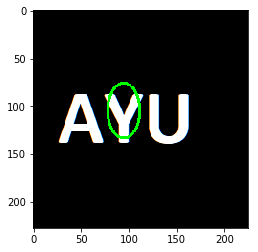

In [14]:
img_c = img.copy()
ellipse = cv2.fitEllipse(cnt)
ellipse_image = cv2.ellipse(img_c,ellipse,(0,255,0),2)
plt.imshow(img_c)

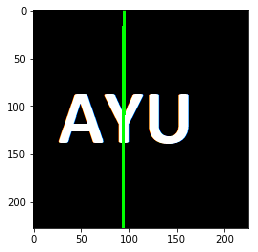

In [15]:
img_c = img.copy()
rows,cols = img_c.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
line_img = cv2.line(img_c,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(line_img)